In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/CIPLA.csv')

In [120]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [121]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [122]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [123]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [124]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:3965,:]
valid = dataset[3965:,:]

In [125]:
dataset

array([[1457.35],
       [1465.25],
       [1435.05],
       ...,
       [787.45],
       [812.2],
       [815.1]], dtype=object)

In [126]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [127]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [128]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

3905/3905 - 56s - loss: 0.0015


In [129]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [130]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [131]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [132]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

23.070059803539195

In [133]:
#for plotting
train = new_data[:3965]
valid = new_data[3965:]
valid['Predictions'] = closing_price

<ipython-input-133-3a86c30a101c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


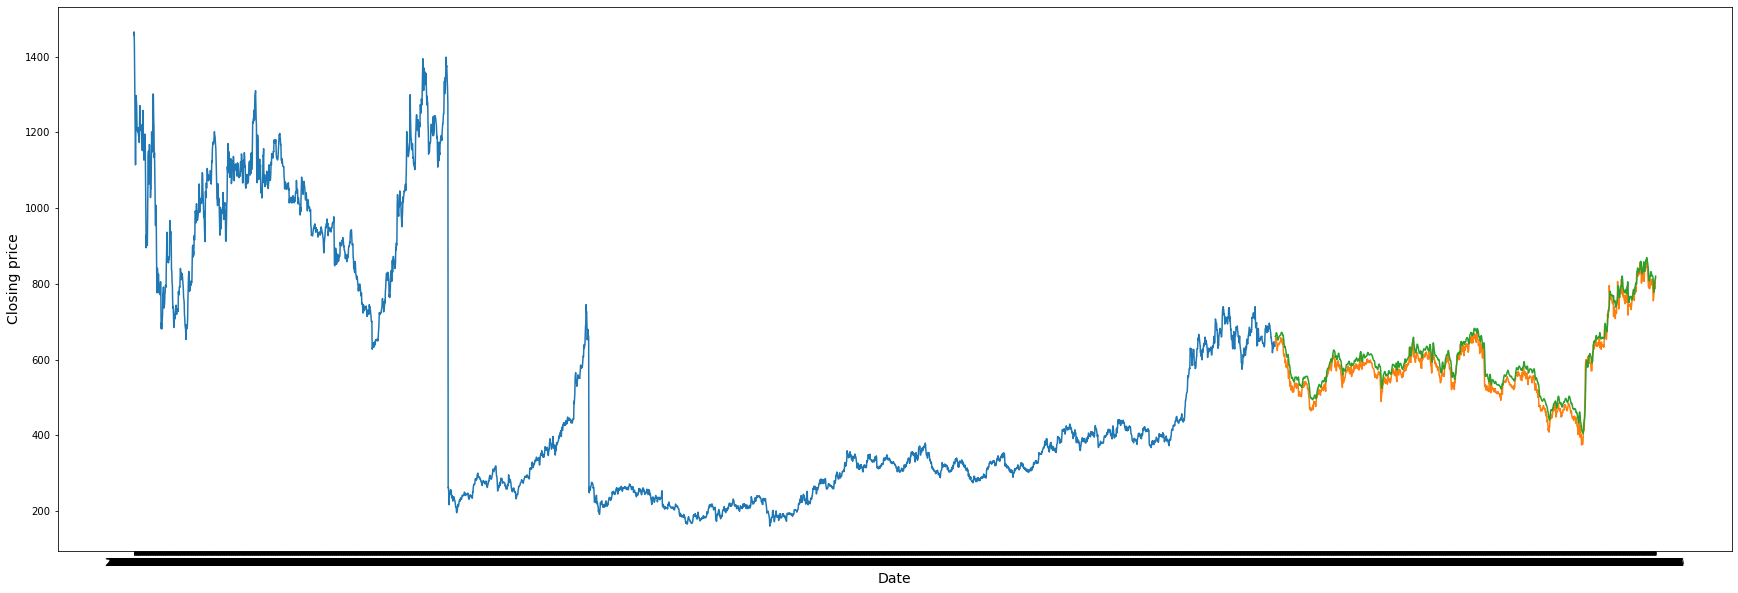

In [134]:

#setting index
plt.figure(figsize=(30,10))

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing price',fontsize=14)
plt.show()

# #setting index
# plt.figure(figsize=(30,10))

# plt.plot(train1,train2)
# plt.plot(valid1,valid2)
# plt.plot(valid1,valid3)
# plt.xlabel('Date')
# plt.ylabel('Closing price')
# plt.show()